**Simple Linear Regression for Salary Prediction**

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
#code to ignore warnings
import warnings
warnings.filterwarnings('ignore')

**LOADING DATA**

In [ ]:
# read the data
data=pd.read_csv("Salary_Data.csv")
data

**EDA and Data Visualization**

In [8]:
#check dtypes of data
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
#check shape of data
data.shape

(30, 2)

In [6]:
#generate Descriptive statistics
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
#check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience'>

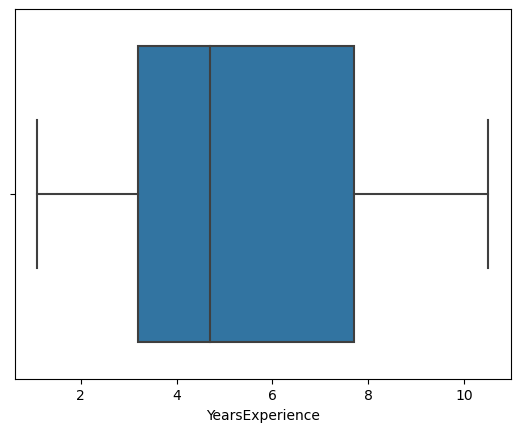

In [14]:
#plotting Boxplot for outliers
sns.boxplot(data['YearsExperience'])


<AxesSubplot:xlabel='Salary'>

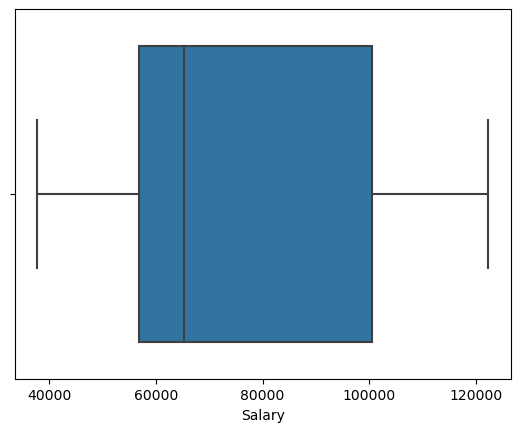

In [15]:
sns.boxplot(data['Salary'])

We can see that there are no outliers and No null values so there is no need for EDA 

0.37956024064804106


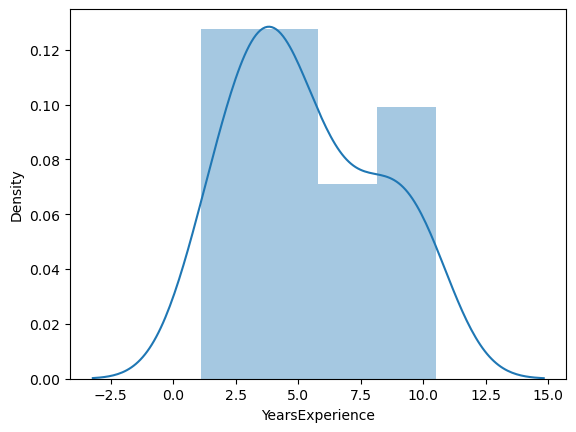

In [9]:
#ploting distplot
sns.distplot(data['YearsExperience'])
print(data['YearsExperience'].skew())

0.35411967922959153


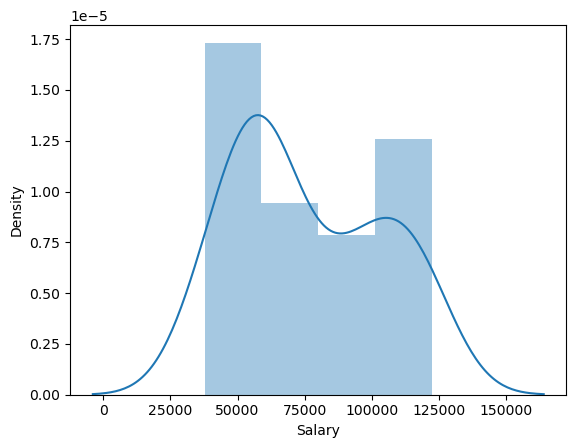

In [10]:
#ploting distplot
sns.distplot(data['Salary'])
print(data['Salary'].skew())

**Correlation Analysis**

In [11]:
#check correlation
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Defining Feature & Target**

In [16]:
X=data['YearsExperience'] # Feature
Y=data['Salary'] # Target

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

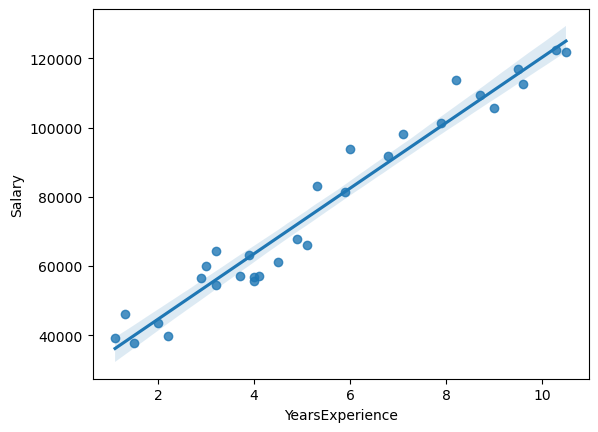

In [17]:
sns.regplot(X,Y)

**Simple Linear Regression Model for Salary prediction**

In [18]:
model=smf.ols('Salary~YearsExperience',data=data).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        14:26:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Testing**

In [20]:
#Finding coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
#Finding t-values and p-values
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [22]:
#Finding Rsquared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

**Model Prediction**

In [23]:
newdata=pd.Series([1.1,1.3])
newdata

0    1.1
1    1.3
dtype: float64

In [24]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,1.1
1,1.3


In [25]:
model.predict(data_pred)

0    36187.158752
1    38077.151217
dtype: float64

**Normalizate Data using MinMaxScaler**

In [27]:
#normalization of data using MinMaxScaler
data2 = data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data2 = pd.DataFrame(mm.fit_transform(data2))

In [29]:
x=data2.iloc[:,0] # Feature
y=data2.iloc[:,-1] # Target


**SquareRoot Transformation**

In [30]:
#Apply square root transformation
sqrt_transform = np.sqrt(data2)
x=sqrt_transform.iloc[:,0] # Feature
y=sqrt_transform.iloc[:,-1] # Target

In [31]:
sqrt_transform.head()

,0,1
0,0.000000,0.137989
1,0.145865,0.316377
2,0.206284,0.000000
3,0.309426,0.261607
4,0.342084,0.159730


<AxesSubplot:ylabel='Density'>

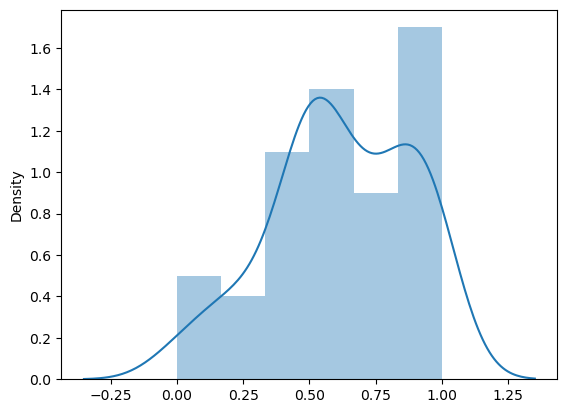

In [32]:
#distplot of square root transformation
sns.distplot(sqrt_transform)

Intercept   -0.013585
x            1.015570
dtype: float64

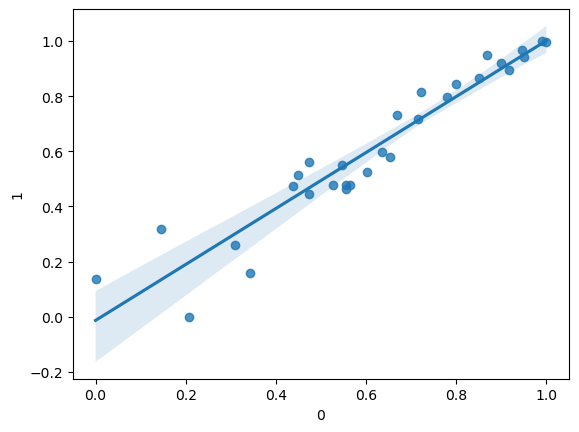

In [33]:
sns.regplot(x,y)
model2=smf.ols("y~x",data=sqrt_transform).fit()
model2.params

In [34]:
#Finding Rsquared values
(model2.rsquared,model2.rsquared_adj)

(0.909169005021548, 0.9059250409151747)

**Log Transformation**

In [35]:
#Apply log transformation
log_transform = np.log(data)
x=log_transform.iloc[:,0] # Feature
y=log_transform.iloc[:,-1]

In [36]:
log_transform.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


<AxesSubplot:ylabel='Density'>

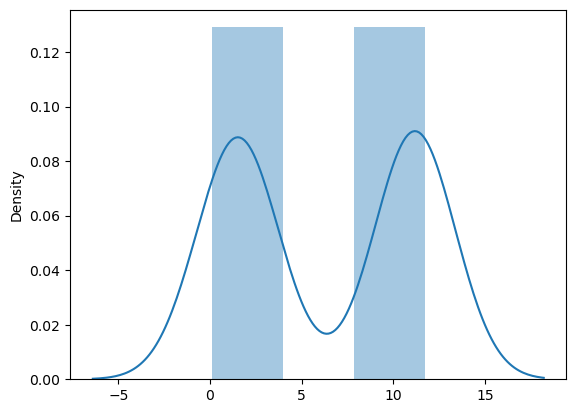

In [37]:
#distplot of log transformation
sns.distplot(log_transform)

Intercept    10.328043
x             0.562089
dtype: float64

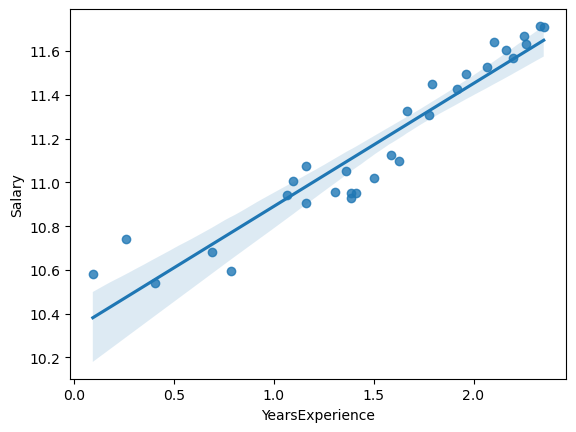

In [38]:
sns.regplot(x,y)
model3=smf.ols("y~x",data=log_transform).fit()
model3.params

In [39]:
#Finding Rsquared values
(model3.rsquared,model3.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

**Conclusion:**
From above analysis Linear Regression Model (without applying any transformation) gives Best R2 score.